#11.1 Date and Time Data Types and Tools

The Python standard library includes data types for date and time data, as well as calendar-related functionality

The **datetime.datetime** type, or simply datetime, is widely used:

In [1]:
from datetime import datetime

In [15]:
now = datetime.now()

In [18]:
now

datetime.datetime(2021, 10, 8, 13, 29, 26, 920993)

In [4]:
now.year, now.month, now.day

(2021, 10, 8)

datetime stores both the date and time down to the **microsecond**

**timedelta represents the temporal difference between two datetime objects:**

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [6]:
delta

datetime.timedelta(days=926, seconds=56700)

In [19]:
delta.days

926

In [20]:
delta.seconds

56700

You can **add** (or **subtract**) a timedelta or multiple thereof to a datetime object to yield a new shifted object:

In [7]:
from datetime import timedelta

In [8]:
start = datetime(2011, 1, 7)

In [9]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [10]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

Table 11-1 summarizes the data types in the datetime module



Table 11-1. Types in datetime module
<p align='center'>
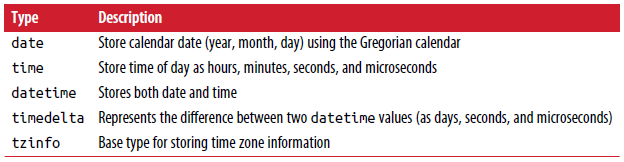
</p>

##Converting Between String and Datetime

You can format **datetime** objects and **pandas Timestamp** objects **as strings** using **str or the strftime** method, passing a format specification: 

In [21]:
stamp = datetime(2011, 1, 3)

In [22]:
str(stamp)

'2011-01-03 00:00:00'

In [23]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

See Table 11-2 for a complete list of the format codes

Table 11-2. Datetime format speciication (ISO C89 compatible)
<p align='center'>
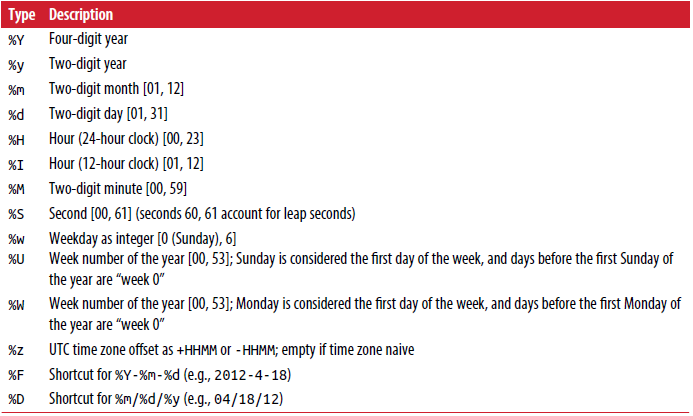
</p>

You can use these same format codes to convert **strings to dates** using date **time.strptime:**

In [26]:
value = '2011-01-03'

In [29]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [31]:
datestrs = ['7/6/2011', '8/6/2011']

In [32]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

datetime.strptime is a good way to parse a date with a known format

However, it can be a bit annoying to have to write a format spec each time, especially for **common date formats**

In this case, you can use the **parser.parse** method in the third-party **dateutil** package (this is installed automatically when you install pandas):

In [33]:
from dateutil.parser import parse

In [34]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

dateutil is capable of parsing most human-intelligible date representations

In [35]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

strptimeIn international locales, **day appearing before month** is very common, so you can pass **dayfirst=True** to indicate this:

In [36]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

pandas is generally oriented toward working with arrays of dates, whether used as an axis index or a column in a DataFrame

The **to_datetime** method **parses many different kinds of date representations.** Standard date formats like **ISO 8601** can be parsed very quickly:

In [37]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [39]:
import pandas as pd

In [40]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

It also handles values that should be considered missing (None, empty string, etc.):

In [41]:
idx = pd.to_datetime(datestrs + [None])

In [42]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [43]:
idx[2]

NaT

In [44]:
pd.isnull(idx)

array([False, False,  True])

NaT (Not a Time) is pandas’s null value for timestamp data

**datetime objects also have a number of locale-specific formatting options for systems in other countries or languages**

For example, the abbreviated month names will be different on German or French systems compared with English systems

See Table 11-3 for a listing

Table 11-3. Locale-speciic date formatting
<p align='center'>
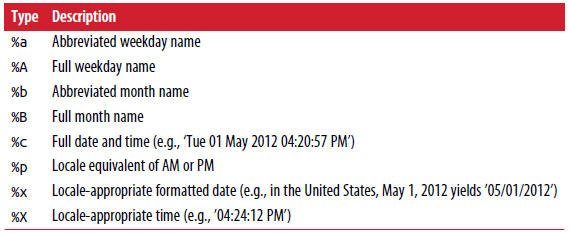
</p>

# 11.2 Time Series Basics

A basic kind of time series object in pandas is a Series **indexed by timestamps,** which is often represented external to pandas as Python strings or datetime objects:

In [48]:
from datetime import datetime
import numpy as np

In [46]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [49]:
ts = pd.Series(np.random.randn(6), index=dates)

In [50]:
ts

2011-01-02   -1.529249
2011-01-05   -0.803305
2011-01-07    0.745483
2011-01-08   -1.100441
2011-01-10    0.140661
2011-01-12   -0.174160
dtype: float64

Under the hood, **these datetime objects have been put in a DatetimeIndex:**

In [51]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)